In [103]:
import numpy as np
import matplotlib.pyplot as plt 

# 1.特征值与特征向量

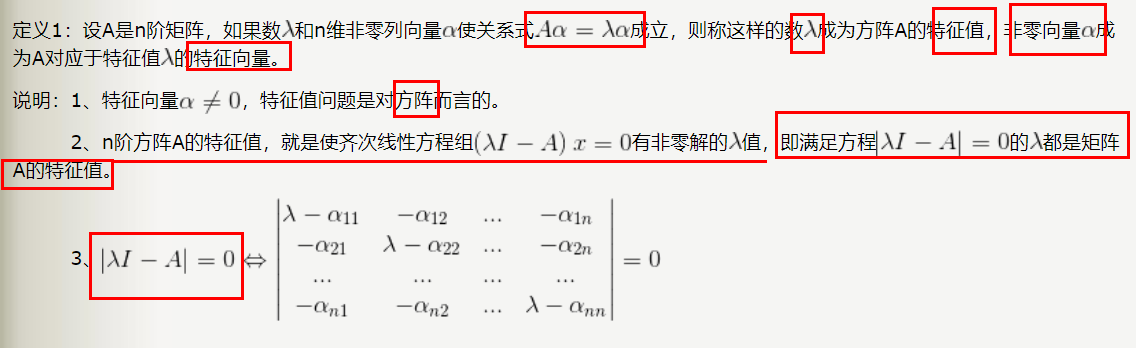

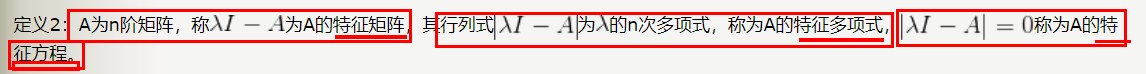

In [104]:
# x=np.diag((1,2,3,4))#以该向量为对角线的矩阵（其余均为0）[当里面是矩阵时就输出对角线]
# x = np.array([[0,-2,-2],[2,2,-2],[-2,-2,2]])
x = np.array([[2,1],[1,2]])

print("矩阵：\n",x,"\n")
eigval,eigvec=np.linalg.eig(x)
print("特征值：\n",eigval,"\n\n特征向量：\n",eigvec)
print("-------------------------------")
y=np.around(np.random.randn(3,3))
print(y)
eigval,eigvec=np.linalg.eig(y)
print("\n\n",np.around(eigval),"\n\n",np.around(eigvec))

矩阵：
 [[2 1]
 [1 2]] 

特征值：
 [3. 1.] 

特征向量：
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
-------------------------------
[[ 1.  0.  0.]
 [ 1. -1. -0.]
 [ 1.  0.  1.]]


 [ 1. -1.  1.] 

 [[ 0.  0.  0.]
 [ 0.  1.  0.]
 [ 1.  0. -1.]]


# 2.SVD（奇异值分解）

In [105]:
a=np.round(np.random.randn(9,6))
print(a)
print(a.shape)
u,s,vh=np.linalg.svd(a)
print(u.shape,s.shape,vh.shape)
print(s)

[[ 1. -1.  1.  0.  0.  0.]
 [-0. -0.  1.  0.  0. -1.]
 [ 1. -1. -1. -1. -0.  1.]
 [-0.  1.  0.  1.  1.  1.]
 [-1.  2. -1.  2. -1.  1.]
 [-1. -1.  1.  1.  1. -1.]
 [-1.  1. -0.  1.  1.  1.]
 [ 1.  0. -0. -0. -2. -0.]
 [-1. -1.  0.  1. -0. -2.]]
(9, 6)
(9, 9) (6,) (6, 6)
[4.47036245 3.94440142 2.82144153 1.79243365 1.39272637 0.58695795]


# 3.SVD图像压缩

In [ ]:
img = plt.imread('data/img/yq.jpg')
print("图像大小：",img.shape)
#降维
img1=img.reshape(1080,1920*3)
print("现在：",img1.shape)
#奇异值分解
U,S,VT = np.linalg.svd(img1)
plt.plot(S)  
plt.title('SVD of Matrix img1')  # 矩阵SVD分解后得到的奇异值分布图
plt.grid()  
plt.show()

图像大小： (1080, 1920, 3)
现在： (1080, 5760)


In [136]:
#升维,重构
print("总共的奇异值个数：",S.size)
sval_nums = 35 # 留存的奇异值个数
print("现在留下的奇异值个数为：{}".format(sval_nums))
img_restruct = (U[:,0:sval_nums]).dot(np.diag(S[0:sval_nums])).dot(VT[0:sval_nums,:])
img_restruct = img_restruct.reshape(1080, 1920,3)

总共的奇异值个数： 1080
现在留下的奇异值个数为：35


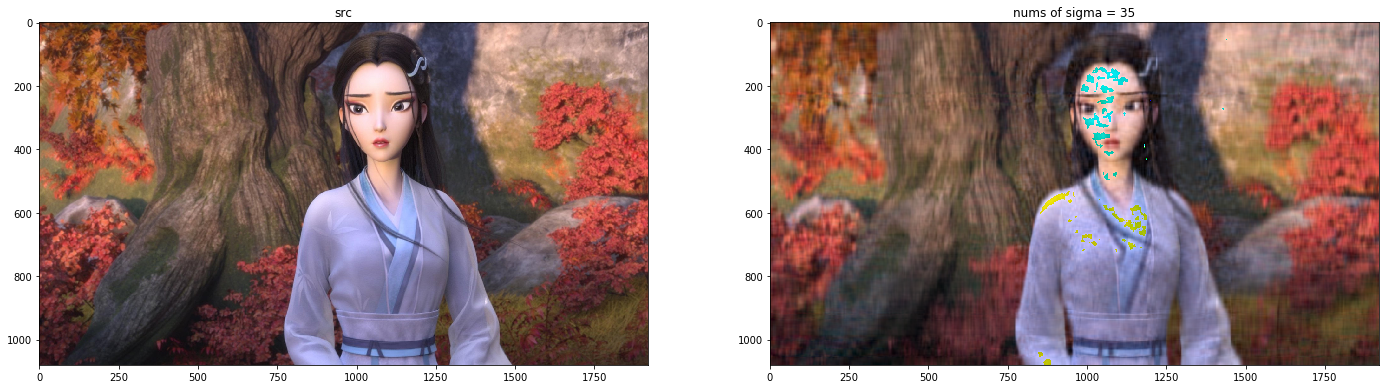

In [137]:
fig, ax = plt.subplots(1,2,figsize = (24,32))
 
ax[0].imshow(img)
ax[0].set(title = "src")
ax[1].imshow(img_restruct.astype(np.uint8))
ax[1].set(title = "nums of sigma = {}".format(sval_nums))
plt.show()

In [138]:
orl_size = img.shape[0]*img.shape[1]
now_size = U.shape[0]*sval_nums+sval_nums*sval_nums+sval_nums*VT.shape[1]
print("原始图片大小：",orl_size)
print("压缩后的大小：",now_size)
print("压缩比：",now_size/orl_size*100,"%")

原始图片大小： 2073600
压缩后的大小： 240625
压缩比： 11.604214891975309 %
